### Problem 4

**4.1 Model Comparison**

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pylab


def draw_curves(
    dir_list,
    archs_list,
    label,
    figure_index=0,
    only_valid=False,
    scale=False,
    ):

    # list of all datas
    epochs_all = []
    train_ppls_all = []
    val_ppls_all = []
    times_all = []

    #index in log file
    ep_idx = 1
    train_ppl_idx = 4
    val_ppl_idx = 7
    times_idx = -1
    for d in dir_list:
        log_path = os.path.join(d, 'log.txt')
        log_data = open(log_path, 'r')
        epochs = []
        train_ppls = []
        val_ppls = []
        times = []
        for columns in (raw.strip().split() for raw in log_data):
            epochs.append(int(columns[ep_idx]) + 1)
            train_ppls.append(float(columns[train_ppl_idx]))
            val_ppls.append(float(columns[val_ppl_idx]))
            times.append(float(columns[times_idx]))
        epochs_all.append(epochs)
        train_ppls = np.log(train_ppls)
        train_ppls_all.append(train_ppls)
        val_ppls = np.log(val_ppls)
        val_ppls_all.append(val_ppls)
        times = np.cumsum(times)
        times = np.log(times)
        times_all.append(times)

    if not scale:
        plt.figure(figsize=(13, 18))
    else:
        plt.figure(figsize=(10, 15))

    # PPL and epochs
    plt.subplot(211)
    for i in range(len(archs_list)):
        if not only_valid:
            plt.plot(epochs_all[i], train_ppls_all[i], '--x',
                     label='Train_' + archs_list[i])
        plt.plot(epochs_all[i], val_ppls_all[i], '-v', label='Val_'
                 + archs_list[i])
        plt.legend(loc='best')
        plt.title('Figure ' + str(2 * figure_index - 1) + ':' + label,
                  y=0.005, x=0.25)
        plt.ylabel('log(PPL)')
        plt.xlabel('Epochs')

    # PPL and times
    plt.subplot(212)
    for i in range(len(archs_list)):
        if not only_valid:
            plt.plot(times_all[i], train_ppls_all[i], '--x',
                     label='Train_' + archs_list[i])
        plt.plot(times_all[i], val_ppls_all[i], '-v', label='Val_'
                 + archs_list[i])
        plt.legend(loc='best')
        plt.xlim([4, 12])
        plt.title('Figure ' + str(2 * figure_index) + ':' + label,
                  y=0.005, x=0.25)
        plt.ylabel('log(PPL)')
        plt.xlabel('log(Wall-clock-time)')

**All curves on a single graph**

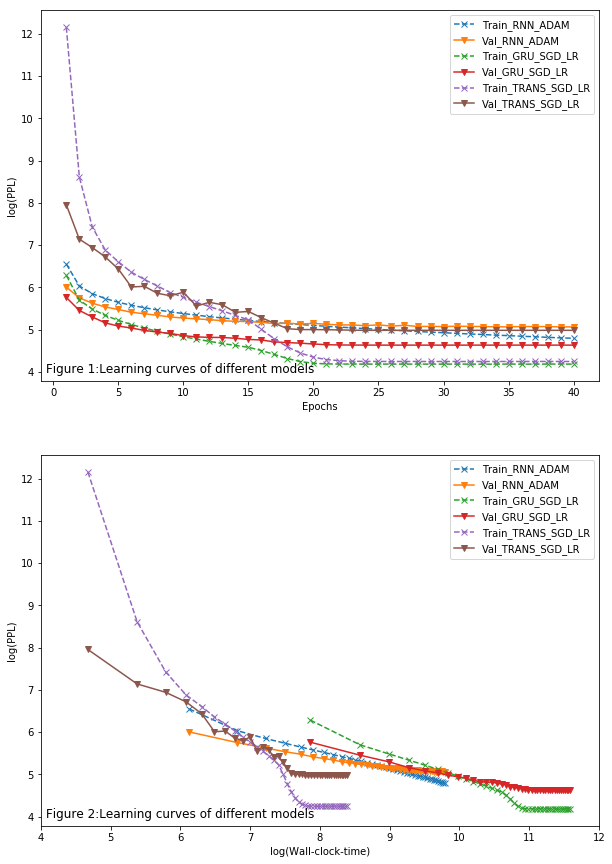

In [3]:
RNN = \
    '4.1/1_RNN_ADAM_model=RNN_optimizer=ADAM_initial_lr=0.0001_batch_size=20_seq_len=35_hidden_size=1500_num_layers=2_dp_keep_prob=0.35_save_best_0'
GRU = \
    '4.1/2_GRU_SGD_LR_SCHEDULE_model=GRU_optimizer=SGD_LR_SCHEDULE_initial_lr=10_batch_size=20_seq_len=35_hidden_size=1500_num_layers=2_dp_keep_prob=0.35_save_best_0'
TRANSFORMER = \
    '4.1/3_TRANSFORMER_SGD_LR_SCHEDULE_model=TRANSFORMER_optimizer=SGD_LR_SCHEDULE_initial_lr=20_batch_size=128_seq_len=35_hidden_size=512_num_layers=6_dp_keep_prob=0.9_save_best_28'

dir_list = [RNN, GRU, TRANSFORMER]
archs_list = ['RNN_ADAM', 'GRU_SGD_LR', 'TRANS_SGD_LR']

draw_curves(
    dir_list,
    archs_list,
    'Learning curves of different models',
    figure_index=1,
    only_valid=False,
    scale=True,
    )

**4.2 Exploration of optimizers**

In [4]:
# directories of these results
RNN_ADAM = \
    '4.2/1_RNN_ADAM_model=RNN_optimizer=ADAM_initial_lr=0.0001_batch_size=20_seq_len=35_hidden_size=1500_num_layers=2_dp_keep_prob=0.35_save_best_0'
GRU_SGD_LR = \
    '4.2/2_GRU_SGD_LR_SCHEDULE_model=GRU_optimizer=SGD_LR_SCHEDULE_initial_lr=10_batch_size=20_seq_len=35_hidden_size=1500_num_layers=2_dp_keep_prob=0.35_save_best_0'
TRANS_SGD_LR = \
    '4.2/3_TRANSFORMER_SGD_LR_SCHEDULE_model=TRANSFORMER_optimizer=SGD_LR_SCHEDULE_initial_lr=20_batch_size=128_seq_len=35_hidden_size=512_num_layers=6_dp_keep_prob=0.9_save_best_28'
RNN_SGD = '4.2/4_RNN_SGD'
GRU_SGD = '4.2/5_GRU_SGD'
TRANS_SGD = \
    '4.2/6_TRANSFORMER_SGD_model=TRANSFORMER_optimizer=SGD_initial_lr=20_batch_size=128_seq_len=35_hidden_size=512_num_layers=6_dp_keep_prob=.9_0'
RNN_SGD_LR = '4.2/7_RNN_SGD_LR_SCHEDULE'
GRU_ADAM = '4.2/8_GRU_ADAM'
TRANS_ADAM = \
    '4.2/9_TRANSFORMER_ADAM_model=TRANSFORMER_optimizer=ADAM_initial_lr=0.001_batch_size=128_seq_len=35_hidden_size=512_num_layers=2_dp_keep_prob=.9_2'

In [5]:
#all_dir_list = [RNN_SGD, RNN_SGD_LR, RNN_ADAM, GRU_SGD, GRU_SGD_LR, 
#            GRU_ADAM, TRANS_SGD, TRANS_SGD_LR, TRANS_ADAM]
#all_archs_list = ['RNN_SGD', 'RNN_SGD_LR', 'RNN_ADAM', 'GRU_SGD', 'GRU_SGD_LR', 
#            'GRU_ADAM', 'TRANS_SGD', 'TRANS_SGD_LR', 'TRANS_ADAM']
#draw_curves(all_dir_list, all_archs_list, 'All-in-one Learning Curves', figure_index=2, only_valid=False, scale=False)

**On RNN**

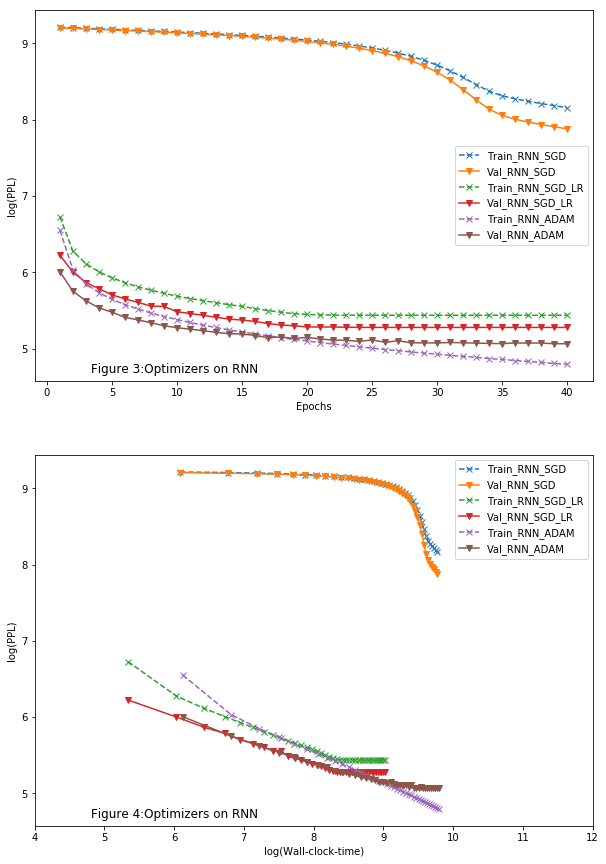

In [7]:
RNN_dir_list = [RNN_SGD, RNN_SGD_LR, RNN_ADAM]
RNN_archs_list = ['RNN_SGD', 'RNN_SGD_LR', 'RNN_ADAM']

draw_curves(
    RNN_dir_list,
    RNN_archs_list,
    'Optimizers on RNN',
    figure_index=2,
    only_valid=False,
    scale=True,
    )

**On GRU**

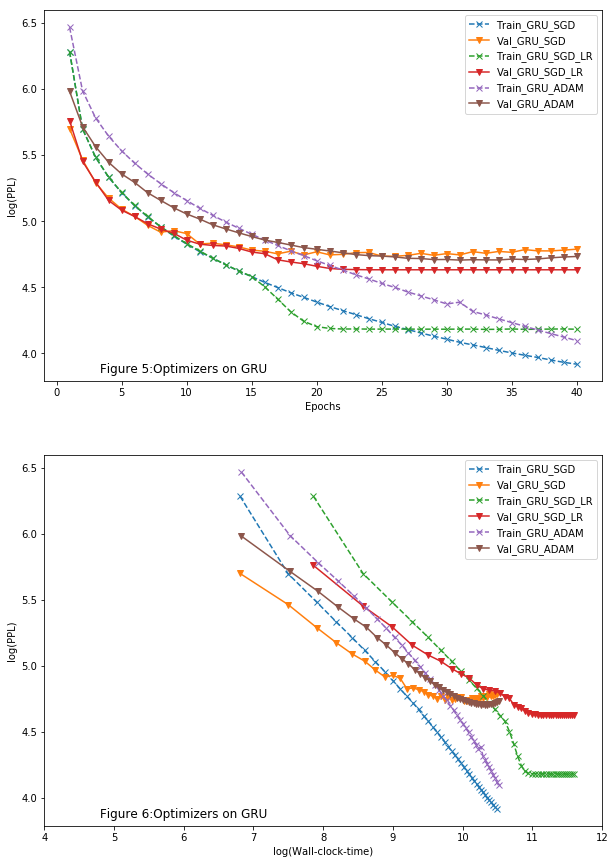

In [8]:
GRU_dir_list = [GRU_SGD, GRU_SGD_LR, GRU_ADAM]
GRU_archs_list = ['GRU_SGD', 'GRU_SGD_LR', 'GRU_ADAM']
draw_curves(
    GRU_dir_list,
    GRU_archs_list,
    'Optimizers on GRU',
    figure_index=3,
    only_valid=False,
    scale=True,
    )

**On Transformer**

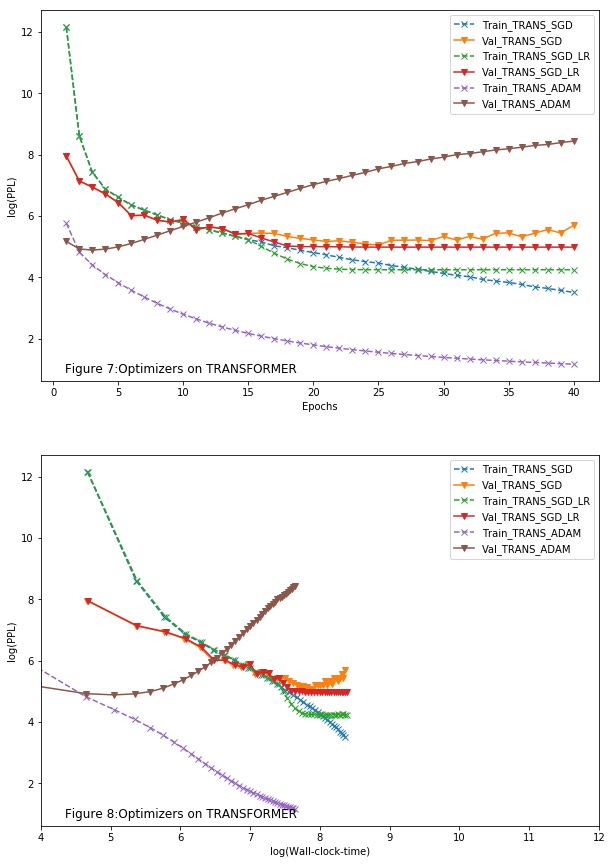

In [9]:
TRANS_dir_list = [TRANS_SGD, TRANS_SGD_LR, TRANS_ADAM]
TRANS_archs_list = ['TRANS_SGD', 'TRANS_SGD_LR', 'TRANS_ADAM']

draw_curves(
    TRANS_dir_list,
    TRANS_archs_list,
    'Optimizers on TRANSFORMER',
    figure_index=4,
    only_valid=False,
    scale=True,
    )